##                                          Bytes对象

Python的字符串是一个变长对象，因为不同长度的字符串所占的内存是不一样的；但同时字符串又是一个不可变对象，因为一旦创建就不可以再修改了。

注：定长对象：这类对象在内存中的占用大小相同。例如：数字1和数字1000在内存中的占用大小是相同的，都是28字节。
   变长对象：这类对象在内存中的占用大小不相同。例如：字符串'a'和字符串'ab'和字符串'abc'在内存中的占用全部是不能相同的。

In [1]:
#定长对象
import sys

a = 1
b = 1000
c = 2 ** 30 - 1
print('the memory size of a is:',sys.getsizeof(a),'byte')
print('the memory size of b is:',sys.getsizeof(b),'byte')
print('the memory size of c is:',sys.getsizeof(c),'byte')

the memory size of a is: 28 byte
the memory size of b is: 28 byte
the memory size of c is: 28 byte


In [2]:
#变长对象
import sys

a = 'a'
ab = 'ab'
abc = 'abc'
print('the memory size of a is:',sys.getsizeof(a),'byte')
print('the memory size of ab is:',sys.getsizeof(ab),'byte')
print('the memory size of abc is:',sys.getsizeof(abc),'byte')

the memory size of a is: 50 byte
the memory size of ab is: 51 byte
the memory size of abc is: 52 byte


Python中的字符串是通过unicode来表示的，在底层对应的结构体是PyUnicodeObject，为什么需要unicode呢?

首先计算机存储的基本单位是字节，1个字节由8个比特位（bit）组成，数量256个（每个bit放置0或1，1个字节8个bit，2*2*2*……=2^8），因此一个字节完全可以表示由于英文字母算上大小写只有52个，再加上若干字符。但是随着计算机的普及，越来越多的非英文字符出现，导致一个字节已经无法表示了。对于一个字节无法表示的字符，使用多个字节表示。

但是这样会出现两个问题：
（1）因为每个国家都有自己的字符编码，所以不支持多国语言，例如中文的编码不可以包含日文，否则就会造成乱码；
（2）没有统一标准，例如中文有GB2312、GBK、GB18030等多个标准。（这一问题在后面解决）
    
先明确两个概念：

字符集：系统支持的所有字符组成的集合。不同的字符集包含的字符个数不一样、包含的字符不一样、对字符的编码方式也不一样。例如GB2312是中国国家标准的简体中文字符集，GB2312收录简化汉字（6763个）及一般符号、序号、数字、拉丁字母、日文假名、希腊字母、俄文字母、汉语拼音符号、汉语注音字母，共 7445 个图形字符。而ASCII字符集只包含了128字符，这个字符集收录的主要字符是英文字母、阿拉伯字母和一些简单的控制字符。

字符编码：负责将每个字符转换成一个或多个计算机可以接受的具体数字，该数字可以理解为编号，如果我们写了一段文本，然后在存储的时候必须先进行编码，也就是将每一个字符都转成一个或多个系统可以接受的数字、即对应的编号之后，才可以进行存储。而编码也分为多种，比如ascii、gbk、utf-8等等，字符编码不同，那么字符转换之后的编号也不同，当然能转化的字符种类也不同。比如ASCII这种字符编码，它就只能转换ASCII字符。当然和字符集一样，字符编码能转换的字符种类也是有限的，像汉字我们可以使用 gbk 编码、utf-8 编码，但是不能使用 ascii 编码。

当然，ASCII比较特殊，它既是字符集、也是字符编码。并且不管采用什么编码，ASCII字符对应的编号永远是相同的。

将字符串中的每一个字符转成对应的编号，那么得到的就是字节序列（bytes对象），因为计算机存储和网络通讯的基本单位都是字节，所以字符串必须以字节序列的形式进行存储或传输。

   因此字符串和字节序列在某种程度上是很相似的，字符串按照指定的编码进行encode即可得到字节序列，也就是将每个字符都转成对应的编号；字节序列按照相同的编码decode即可得到字符串，也就是根据编号找到对应的字符。
  

In [4]:
s = "abc"
print(s.encode("gbk"))  # b'abc'
print(s.encode("gbk").decode("utf-8"))  # abc

# 但如果是非ASCII字符，就不行了
try:
    s = "你好"
    print(s.encode("gbk"))
    s.encode("gbk").decode("utf-8")
except UnicodeError as e:
    # 报错了，无法解析
    print(e)  

b'abc'
abc
b'\xc4\xe3\xba\xc3'
'utf-8' codec can't decode byte 0xc4 in position 0: invalid continuation byte


# 1.bytes 对象底层结构
如何存储在计算机中，以何种编码格式存储

字节串（bytes）和字符串（string）的对比：
字符串由若干个字符组成，以字符为单位进行操作；字节串由若干个字节组成，以字节为单位进行操作（8位的2进制/2位的16进制）。
字节串和字符串除了操作的数据单元不同之外，它们支持的所有方法都基本相同。
字节串和字符串都是不可变序列，不能随意增加和删除数据。

字符串和 bytes 存在着千丝万缕的联系，我们可以通过字符串来创建 bytes 对象，或者说将字符串转换成 bytes 对象。有以下三种方法可以达到这个目的：
（1）如果字符串的内容都是 ASCII 字符，那么直接在字符串前面添加b前缀就可以转换成 bytes。
（2）bytes 是一个类，调用它的构造方法，也就是 bytes()，可以将字符串按照指定的字符集转换成 bytes；如果不指定字符集，那么默认采用 UTF-8。
（3）字符串本身有一个 encode() 方法，该方法专门用来将字符串按照指定的字符集转换成对应的字节串；如果不指定字符集，那么默认采用 UTF-8。

但在存储或网络通讯时，传输的都是二进制，字符串不可避免地要序列化成字节序列。为此，Python除了提供字符串之外，还额外提供了字节序列（字节串），也就是 bytes 对象。

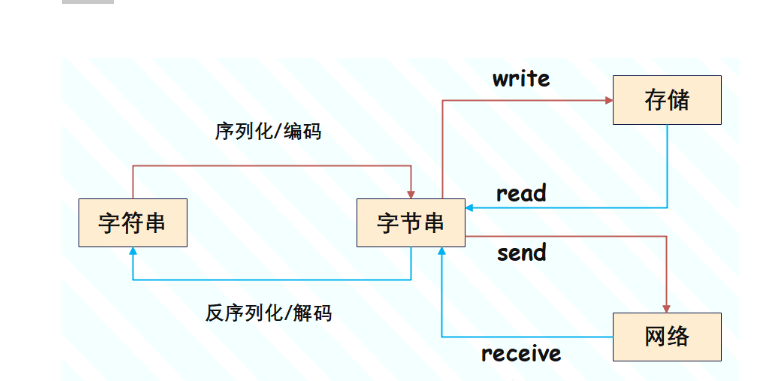

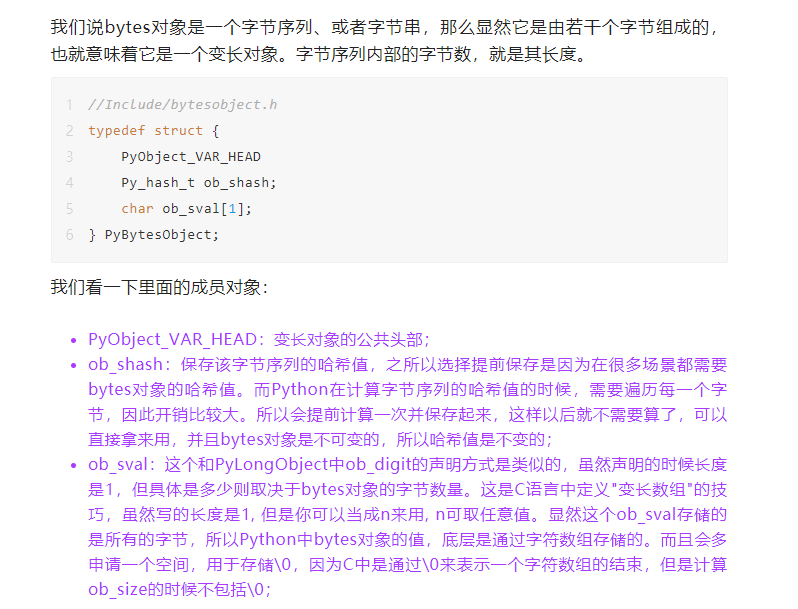

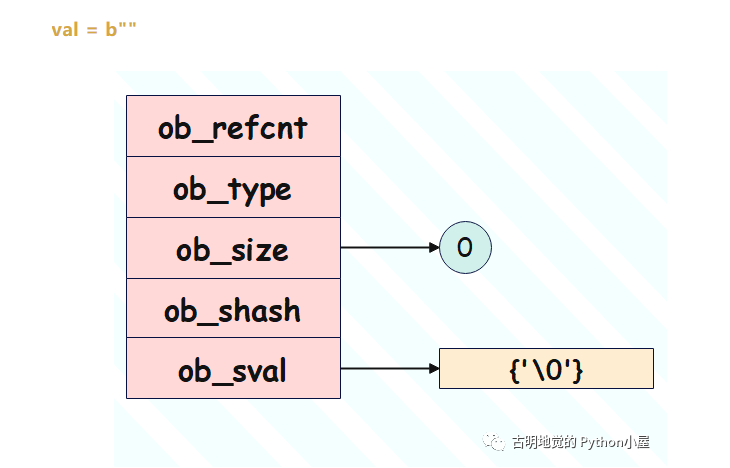

In [5]:
val = b""

In [6]:
import sys
sys.getsizeof(val)
#即便是空的字节序列，底层的ob_savl也是需要一个'\0'的，除了ob_sval之外的四个成员,每个都是8字节，而ob_sval是一个char类型的数组
#一个char占1字节，所以Python中bytes对象占的内存等于32 + ob_sval的长度。

33

注意：ob_size统计的是ob_sval中有效字节的个数，不包括'\0'，但是计算占用内存的时候，显然是需要考虑在内的，因为它确实多占用了一个字节的空间。所以说bytes对象占的内存等于33 + ob_size也是可以的。

In [7]:
val=b"abc"
sys.getsizeof(val)

36

## 创建 bytes 对象

In [8]:
#方法1：如果字符串的内容都是 ASCII 字符，那么直接在字符串前面添加b前缀就可以转换成 bytes
b1=b"hello"
print(b1) #最简单的创建方式，但这种创建方式只使用于ASCII字符。

b'hello'


In [9]:
b2=b"古明地觉"
print(b2)
#古明地觉"包含非ASCII字符，所以采用多字节编,编码方式也有多种(utf-8、gbk等)，Python不知道你用的是哪一种。因此采用字面量的方式，只能使用ASCII字符串，如果使用非ASCII字符串，那么必须手动指定编码。

SyntaxError: bytes can only contain ASCII literal characters. (<ipython-input-9-97f47c5949b1>, line 1)

In [10]:
#方法2：bytes 是一个类，调用bytes()，可以将字符串按照指定的字符集转换成 bytes；如果不指定字符集，那么默认采用 UTF-8。
b = bytes("古明地觉", encoding="utf-8")#encode编码，decode解码
print(b)  # b'\xe5\x8f\xa4\xe6\x98\x8e\xe5\x9c\xb0\xe8\xa7\x89'

b'\xe5\x8f\xa4\xe6\x98\x8e\xe5\x9c\xb0\xe8\xa7\x89'


In [11]:
#方法2：16进制格式
b = b"\x61\x62\x63"
print(b)  # b'abc'

b'abc'


In [12]:
# \x61、\x62、\x63均表示1字节
print(b"\x61\x62\x63")  # b'abc'
# 下面这种创建的bytes对象是6字节
print(b"616263")  # b'616263'

b'abc'
b'616263'


In [13]:
#16进制但开头没有“\x”，使用bytes.fromhex（）
print(bytes.fromhex("616263"))  # b'abc'
# 转成bytes对象之后，如果能用ASCII字符显示的话
# 那么就用ASCII字符显示，比如 abc
# 不能的话，就原本输出，比如\xff
print(bytes.fromhex("616263FF"))  # b'abc\xff'

b'abc'
b'abc\xff'


该方法会将里面字符串当成16进制来解析，得到bytes对象。并且使用这种方式的话，字符的个数一定是偶数，每个字符的范围均是0~9、A-F(或者a-f)。因为16进制需要两个字符来表示，范围是00到FF。即便小于16，也必须用两个字符表示，比如我们可以写成05，但绝不能只写个5。


总之使用bytes.fromhex 创建时，字符串的长度一定是一个偶数，从前往后每两个分为一组。字面量的方式创建时也是如此，比如我们可以写成b"\x01\x02"，但绝不能写成b"\x1\x2"。

In [14]:
# 不可以写成 b"\x0"，会报错
b1 = b"\x00"
print(b1)  # b'\x00'

# \x后面至少跟两个字符，但这里跟了3个字符
# 所以 \x 会和 61 结合，形成 'a'
# 至于后面的那个 1 就单纯的表示字符 '1'
b2 = b"\x611"
print(b2)  # b'a1'

b'\x00'
b'a1'


所以\x后面可以跟超过两个以上的字符，超过两个以上的部分会当成普通字符来处理，与十六进制无关，每个\x只和它后面两个字符结合；但 \x 后面不能少于两个字符。

问题又来了，如果我有一串整数，是十进制的，这个时候怎么创建呢？

In [15]:
#里面的每个数值范围均是 0~255,传入一个整型组成的列表
b1 = bytes([97, 98, 99])
print(b1)  # b'abc'

b'abc'


这种创建方式也是很方便的，总之 bytes 对象的创建方式有多种，相信还是有部分小伙伴没有仔细观察打印bytes对象时输出的内容。核心就在于bytes对象本质上是字节序列，你看到的\x表示的是：该字节是通过\x加上16进制的ASCII码来显示的。

然后我们通过索引获取的时候，得到也是一个整数：

In [16]:
#方法3：字符串本身有一个 encode() 方法，该方法专门用来将字符串按照指定的字符集转换成对应的字节串；如果不指定字符集，那么默认采用 UTF-8。
b = "古".encode("utf-8")
print(b)  # b'\xe5\x8f\xa4'

lst = [b[0], b[1], b[2]]
print(lst)  # [229, 143, 164]

print(bytes(lst).decode("utf-8"))  # 古

b'\xe5\x8f\xa4'
[229, 143, 164]
古


# 2.bytes对象的行为


bytes对象支持的序列型操作一共有5个：

sq_length：查看序列的长度

sq_concat：将两个序列合并为一个

sq_repeat：将序列重复多次

sq_item：根据索引获取指定位置的字节，返回的是一个整数

sq_contains：判断某个序列是不是该序列的子序列，对应 Python 中的 in 操作符

## 2.1 查看序列长度：

In [5]:
a = b"abc"
b = b"def"
a + b

b'abcdef'

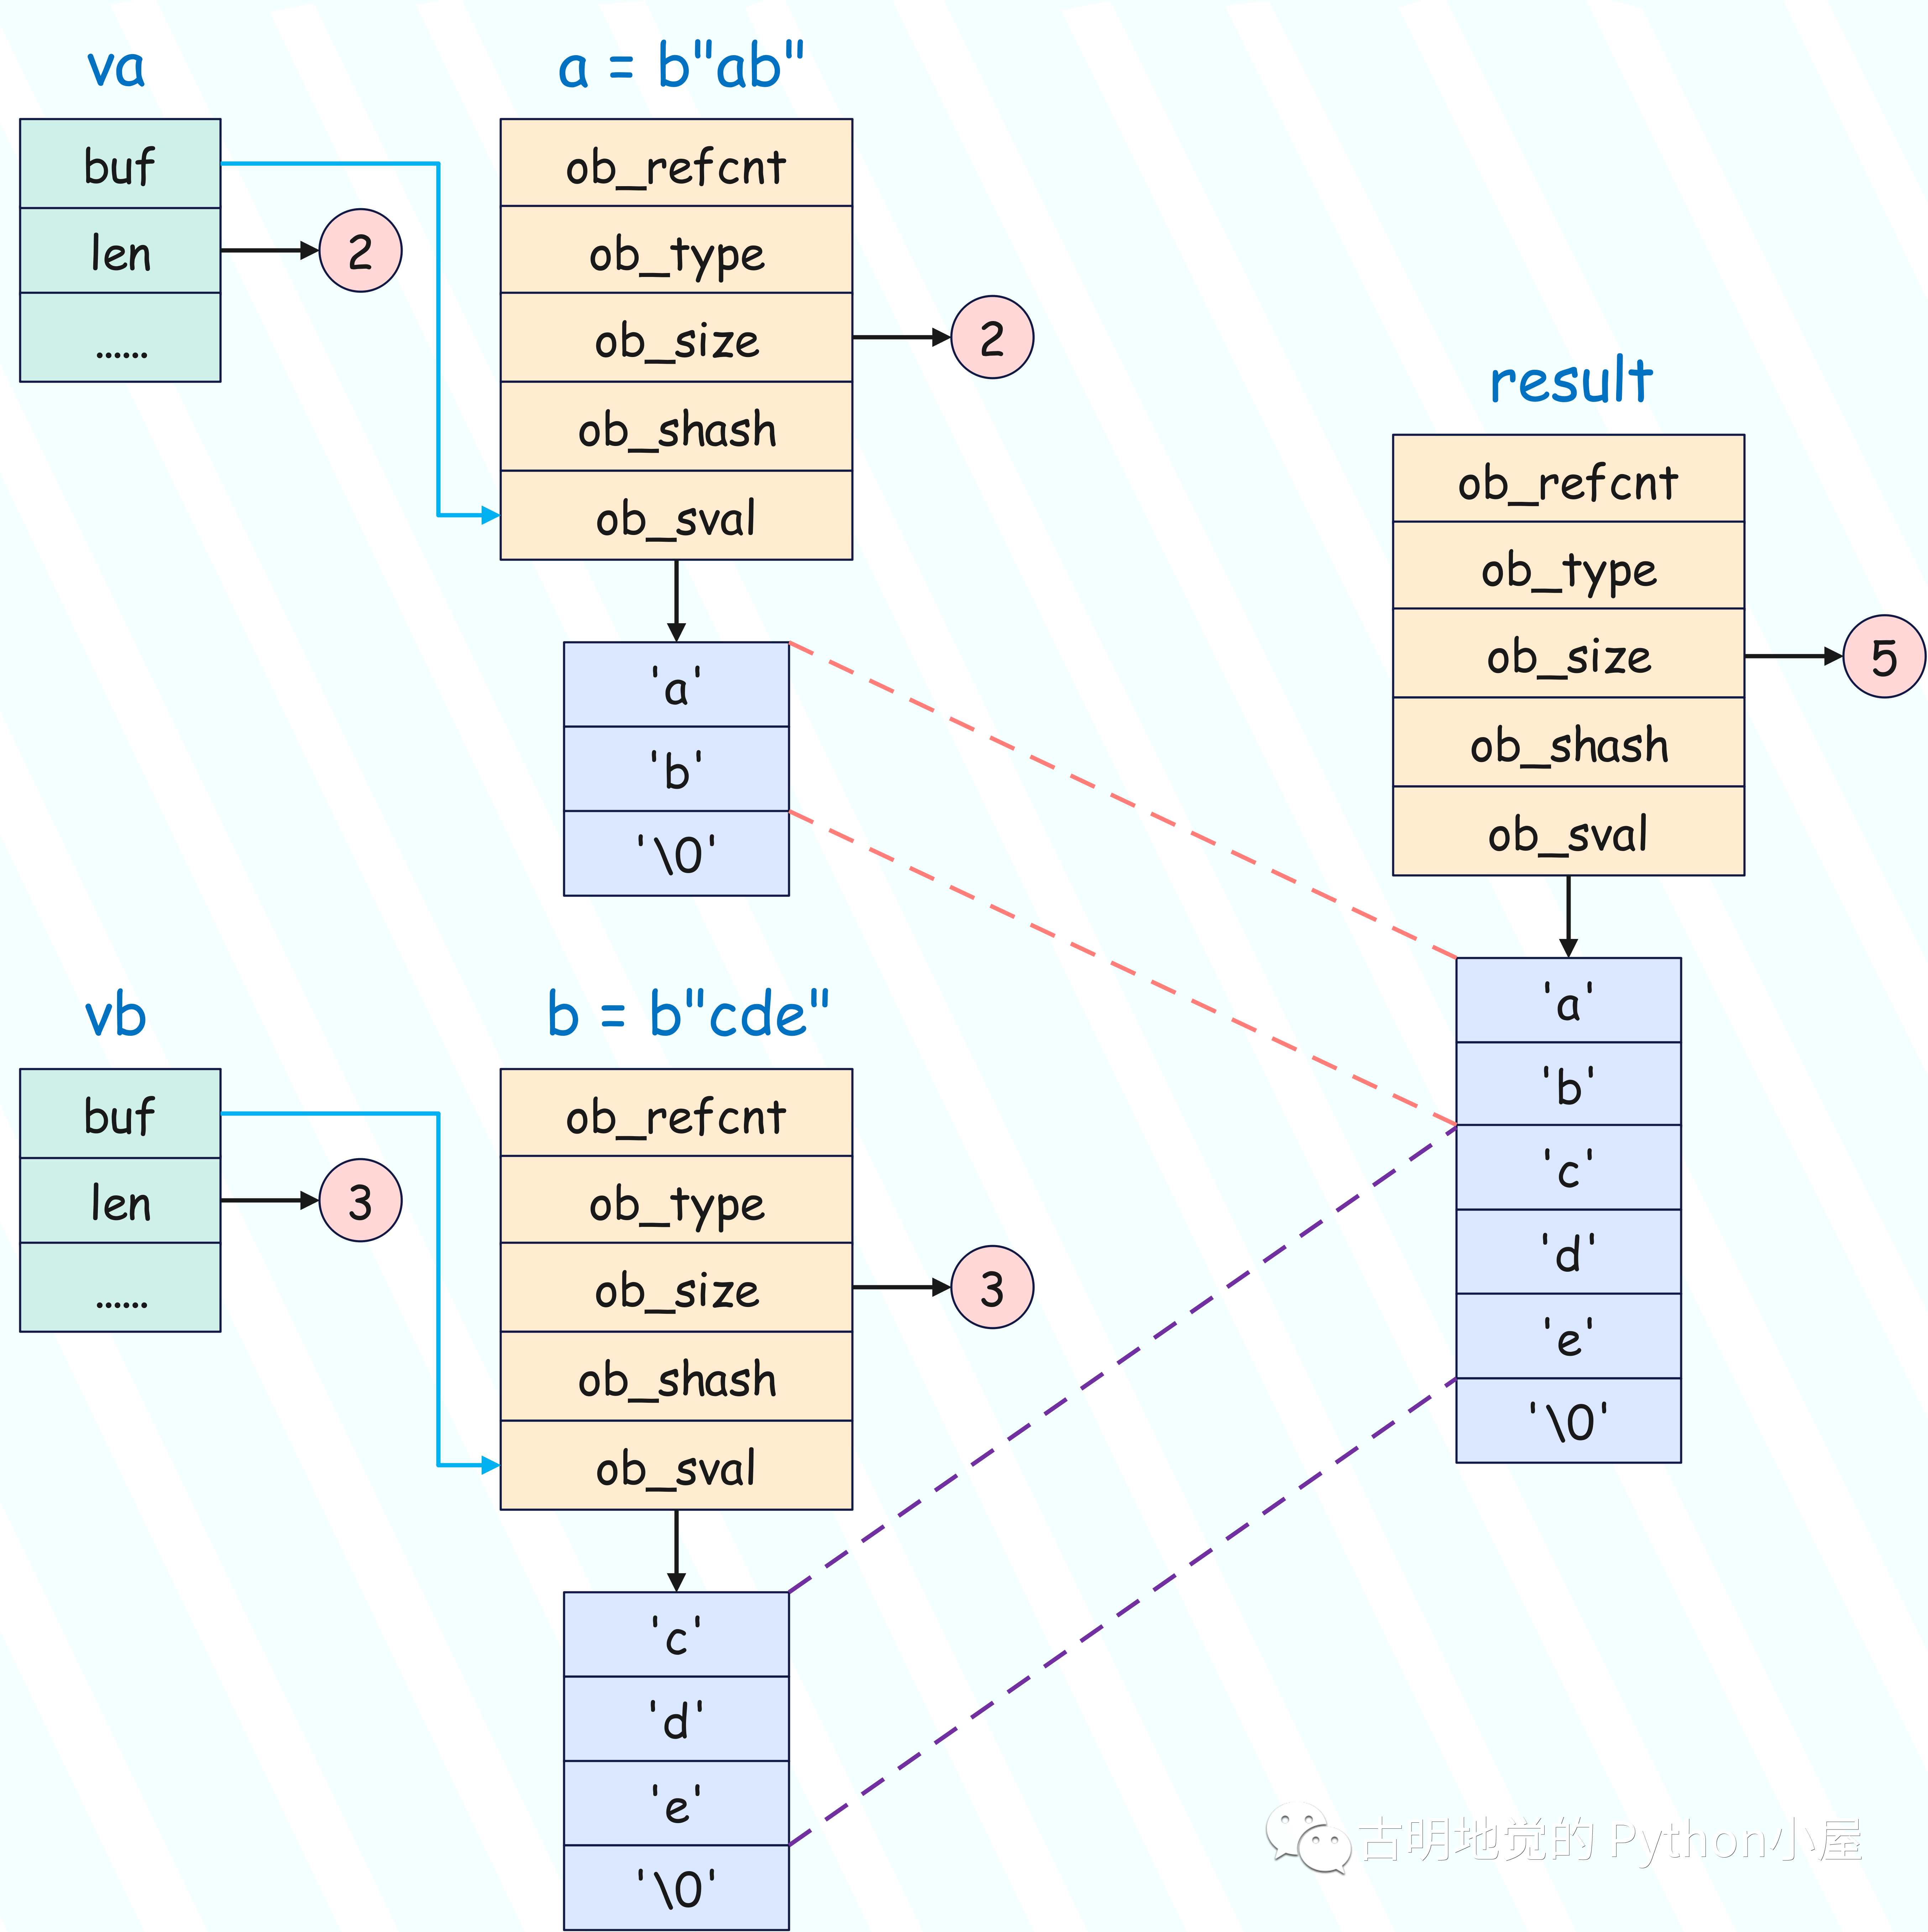

## 2.2 将序列重复多次：

In [6]:
a = b"abc"
a * 3

b'abcabcabc'

In [7]:
a * -1 #如果乘上一个负数，等于乘上0，那么会得到一个空的字节序列。

b''

In [8]:
#注意：就是当重复之后的序列和原序列相同时，那么不会创建新的bytes对象，只需给原来的bytes对象的引用计数增加1即可
b1 = b"abc"
b2 = b1 * 1
id(b1) == id(b2)

True

## 2.3 根据索引或切片获取指定元素：

In [9]:
val = b"abcdef"
val[1], type(val[1])

(98, int)

In [10]:
val[1: 4], type(val[1:4])

(b'bcd', bytes)

In [10]:
class A:

    def __getitem__(self, item):
        return item


a = A()
print(a)
print(A)
print(a[123])  # 123
print(a["name"])  # name
print(a[1: 5])  # slice(1, 5, None)
print(a[1: 5: 2])  # slice(1, 5, 2)
print(a["yo": "ha": "哼哼"])  # slice('yo', 'ha', '哼哼')

<class '__main__.A'>
123
name
slice(1, 5, None)
slice(1, 5, 2)
slice('yo', 'ha', '哼哼')


## 2.4 判断一个序列是否在指定的序列中：

In [15]:
val = b"abcdef"
b"abc" in val

True

In [16]:
b"cbd" in val

False

# 3.效率问题：字节序列缓存池

bytes对象的效率：Python的不可变对象在运算时，处理方式是再创建一个新的。所以三个bytes对象a、b、c在相加时，那么会先根据a + b创建临时对象，然后再根据临时对象+c创建新的对象，最后返回指针。这是一种效率非常低下的做法，因为涉及大量临时对象的创建和销毁，不仅是这里字节序列，后面要分析的字符串也是同样的道理。

官方推荐的做法是，使用join，字符串和字节序列都可以对一个列表进行join，将列表里面的多个字符串或者字节序列join在一起。

为了优化单字节bytes对象的创建效率，Python底层维护了一个缓存池，该缓存池是一个PyBytesObject*类型的数组。Python内部创建单字节bytes对象时，先检查目标对象是否已在缓存池中。PyBytes_FromStringAndSize函数是负责创建bytes对象的一个常用的Python/C API，位于Objects/bytesobject.c中：

当Python程序开始运行时，字节序列缓存池是空的。但随着单字节bytes对象的创建，缓存池中的对象慢慢多了起来。

这样一来，单字节序列首次创建后便在缓存池中缓存起来；后续再次使用时， Python直接从缓存池中取，避免重复创建和销毁。与前面章节介绍的小整数对象池一样，字节序列缓存池也只能容纳为数不多的 256 个单字节序列，但使用频率非常高。

缓存池技术作为一种以空间换时间的优化手段，只需较小的内存为代价，便可明显提升执行效率。

In [1]:
a1 = b"a"
a2 = b"a"
a1 is a2

True

In [2]:
a1 = b"ab"
a2 = b"ab"
a1 is a2

False

In [1]:
def bad():
    s = ""
    for _ in range(1, 10):
        s += str(_)
    return s

def good():
    l = []
    for _ in range(1, 10):
        l.append(str(_))
    return "".join(l)

def better():
    return "".join(str(_) for _ in range(1, 10))

def best():
    return "".join(map(str, range(1, 10)))

In [48]:
import time
time_start = time.time()  # 记录开始时间
def bad():
    s = ""
    for _ in range(1, 10):
        s += str(_)
    return s
print(bad())
time_end = time.time()  # 记录结束时间
time_sum = time_end - time_start  # 计算的时间差为程序的执行时间，单位为秒/s


print(format(time_sum,'.20f')) 

123456789
0.00099873542785644531


In [53]:
import time
time_start = time.time()  # 记录开始时间
def good():
    l = []
    for _ in range(1, 10):
        l.append(str(_))
    return "".join(l)
print(good())
time_end = time.time()  # 记录结束时间
time_sum = time_end - time_start  # 计算的时间差为程序的执行时间，单位为秒/s


print(format(time_sum,'.20f')) 

123456789
0.00099515914916992188


注：单字节bytes对象会缓存起来，不是单字节则不会缓存。

## bytearray对象

它的表现和bytes对象是完全一致的，但一个是可变对象、一个是不可变对象。

In [60]:
# 传入一个整型组成的列表创建bytearray对象
s = bytearray([99, 100, 101])
print(s)  # bytearray(b'cde')

# 传入一个bytes对象创建bytearray对象
s = bytearray(b"abc")
print(s)

# 传入一个字符串，同时指定encoding编码创建bytearray对象
s = bytearray("古明地觉", encoding="utf-8")
print(s)  # bytearray(b'\xe5\x8f\xa4\xe6\x98\x8e\xe5\x9c\xb0\xe8\xa7\x89')

# 我们对s进行decode会直接得到字符串
print(s.decode("utf-8"))  # 古明地觉

# 注意：bytearray对象是可以变的
# 如果是中文，为了防止出现乱码，所以一次要改变3个字节
s[-3:] = "恋".encode("utf-8")
print(s)  # bytearray(b'\xe5\x8f\xa4\xe6\x98\x8e\xe5\x9c\xb0\xe6\x81\x8b')
print(s.decode("utf-8"))  # 古明地恋

# 我们同样可以根据索引、切片获取
s = bytearray(b"abc")
# 获取单个元素也会得到整型，这一点和bytes对象是一样的
print(s[0], s[1], s[2])  # 97 98 99
# 通过切片得到bytearray
print(s[:2])  # bytearray(b'ab')

# 对多个bytearray对象进行join, 会得到一个bytes对象
print(b"--".join([bytearray(b"abc"), bytearray(b"def")]))  # b'abc--def'

bytearray(b'cde')
bytearray(b'abc')
bytearray(b'\xe5\x8f\xa4\xe6\x98\x8e\xe5\x9c\xb0\xe8\xa7\x89')
古明地觉
bytearray(b'\xe5\x8f\xa4\xe6\x98\x8e\xe5\x9c\xb0\xe6\x81\x8b')
古明地恋
97 98 99
bytearray(b'ab')
b'abc--def'
